In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

In [106]:
df = pd.read_csv("owid-covid-data.csv",low_memory = False)
df['date'] = pd.to_datetime(df['date'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49668 entries, 0 to 49667
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         49381 non-null  object        
 1   continent                        49094 non-null  object        
 2   location                         49668 non-null  object        
 3   date                             49668 non-null  datetime64[ns]
 4   total_cases                      49032 non-null  float64       
 5   new_cases                        48809 non-null  float64       
 6   new_cases_smoothed               48027 non-null  float64       
 7   total_deaths                     49032 non-null  float64       
 8   new_deaths                       48809 non-null  float64       
 9   new_deaths_smoothed              48027 non-null  float64       
 10  total_cases_per_million          48745 non-null  float64  

In [107]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
49663,NaN,NaN,International,2020-10-08,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49664,NaN,NaN,International,2020-10-09,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49665,NaN,NaN,International,2020-10-10,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49666,NaN,NaN,International,2020-10-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49667,NaN,NaN,International,2020-10-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
print("Size/shape of dataset",df.shape)
print("Checking for null values",df.isnull().sum())
print("Checking data types",df.dtypes)



Size/shape of dataset (49668, 41)
Checking for null values iso_code                             287
continent                            574
location                               0
date                                   0
total_cases                          636
new_cases                            859
new_cases_smoothed                  1641
total_deaths                         636
new_deaths                           859
new_deaths_smoothed                 1641
total_cases_per_million              923
new_cases_per_million                923
new_cases_smoothed_per_million      1706
total_deaths_per_million             923
new_deaths_per_million               923
new_deaths_smoothed_per_million     1706
new_tests                          31622
total_tests                        31203
total_tests_per_thousand           31203
new_tests_per_thousand             31622
new_tests_smoothed                 29251
new_tests_smoothed_per_thousand    29251
tests_per_case                     3085

In [109]:
df = df[df.location != 'International' ]
df = df[df.location != 'World']
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
49089,ZWE,Africa,Zimbabwe,2020-10-08,7919.0,4.0,11.571,229.0,0.0,0.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
49090,ZWE,Africa,Zimbabwe,2020-10-09,7951.0,32.0,14.429,229.0,0.0,0.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
49091,ZWE,Africa,Zimbabwe,2020-10-10,7994.0,43.0,19.429,229.0,0.0,0.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
49092,ZWE,Africa,Zimbabwe,2020-10-11,8010.0,16.0,17.857,230.0,1.0,0.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
49093,ZWE,Africa,Zimbabwe,2020-10-12,8011.0,1.0,18.000,230.0,0.0,0.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [110]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.845800e+04,48458.000000,47681.000000,48458.000000,48458.000000,47681.000000,48458.000000,48458.000000,47681.000000,48458.000000,...,43394.000000,28843.000000,43960.000000,45548.000000,34316.000000,33875.000000,20492.000000,39646.000000,48467.000000,42705.000000
mean,5.889818e+04,775.272339,767.004093,2252.982315,22.235771,22.253873,2159.371351,26.886969,26.429755,62.347069,...,20868.676953,12.228953,251.930817,8.047469,10.828820,32.619483,52.232826,3.108323,74.009278,0.724175
std,3.717367e+05,4666.935911,4561.004144,11933.502247,126.511963,116.229165,4480.962514,80.632873,61.660513,149.365682,...,20463.830210,19.380989,117.830378,4.163797,10.512323,13.483815,31.828440,2.532061,7.403069,0.152973
min,0.000000e+00,-8261.000000,-552.000000,0.000000,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,6.900000e+01,0.000000,0.714000,1.000000,0.000000,0.000000,38.850000,0.000000,0.169000,0.061000,...,5338.454000,0.500000,155.898000,5.310000,1.900000,21.400000,20.859000,1.300000,69.870000,0.606000
50%,1.178000e+03,11.000000,15.857000,23.000000,0.000000,0.143000,319.597000,1.687000,3.184000,5.716000,...,14048.881000,1.800000,240.208000,7.110000,6.300000,31.400000,52.232000,2.500000,75.490000,0.754000
75%,1.275075e+04,172.000000,178.571000,267.000000,3.000000,3.143000,2235.074000,19.678750,21.875000,40.481000,...,32415.132000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.655000,0.847000
max,7.762544e+06,97894.000000,93198.571000,214771.000000,4928.000000,2715.143000,44422.886000,4944.376000,1083.470000,1237.551000,...,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [111]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [112]:
df.nunique()

iso_code                             210
continent                              6
location                             210
date                                 287
total_cases                        18413
new_cases                           4178
new_cases_smoothed                  9266
total_deaths                        6131
new_deaths                           900
new_deaths_smoothed                 2175
total_cases_per_million            31521
new_cases_per_million              17223
new_cases_smoothed_per_million     19916
total_deaths_per_million           16280
new_deaths_per_million              3148
new_deaths_smoothed_per_million     3880
new_tests                          10612
total_tests                        17839
total_tests_per_thousand           14819
new_tests_per_thousand              3162
new_tests_smoothed                 11863
new_tests_smoothed_per_thousand     3262
tests_per_case                     16497
positive_rate                        549
tests_units     

In [113]:
df['location'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Western Sahara', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'Falkland Islands', 'France',

In [114]:
#Dorping the column
df.drop(["tests_units"],1,inplace=True)

In [115]:
df['population']

0          106766.0
1          106766.0
2          106766.0
3          106766.0
4          106766.0
            ...    
49089    14862927.0
49090    14862927.0
49091    14862927.0
49092    14862927.0
49093    14862927.0
Name: population, Length: 49094, dtype: float64

In [116]:
df['tests_per_case']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
49089    59.802
49090       NaN
49091       NaN
49092       NaN
49093       NaN
Name: tests_per_case, Length: 49094, dtype: float64

In [117]:
#Grouping different types of cases as per the date
datewise = df.groupby(['date']).agg({'total_cases': "sum", "new_cases": "sum", "new_cases_smoothed": "sum", "total_deaths": "sum",
                                    'new_deaths': 'sum', 'new_deaths_smoothed': 'sum', 'new_tests': 'sum', 'total_tests': 'sum','new_tests_smoothed': 'sum',})

In [118]:
datewise.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_tests,total_tests,new_tests_smoothed
count,2.870000e+02,287.000000,287.000000,2.870000e+02,287.000000,287.000000,2.870000e+02,2.870000e+02,2.870000e+02
mean,9.944558e+06,130899.466899,127426.906401,3.804008e+05,3754.358885,3697.166993,1.544670e+06,1.105439e+08,1.678042e+06
std,1.127789e+07,111312.399038,108869.026979,3.534353e+05,2608.333517,2449.725921,1.397022e+06,1.284258e+08,1.521024e+06
min,2.700000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.240285e+05,8674.500000,4706.001500,4.452000e+03,301.500000,173.501000,3.678300e+04,4.425915e+05,3.539950e+04
50%,5.058591e+06,97219.000000,94667.857000,3.326790e+05,4407.000000,4746.577000,1.390290e+06,5.318064e+07,1.529115e+06
75%,1.771066e+07,241145.500000,252828.361500,6.773205e+05,5653.500000,5577.365500,2.706824e+06,1.954539e+08,2.935852e+06
max,3.719408e+07,387487.000000,328057.716000,1.067783e+06,10491.000000,7456.864000,4.613063e+06,4.350121e+08,4.409654e+06


In [119]:
datewise.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_tests,total_tests,new_tests_smoothed
date,,,,,,,,,
2019-12-31,27.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,27.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0
2020-01-02,27.0,0.0,0.0,0.0,0.0,0.0,16.0,20.0,0.0
2020-01-03,44.0,17.0,0.0,0.0,0.0,0.0,18.0,38.0,0.0
2020-01-04,44.0,0.0,0.0,0.0,0.0,0.0,6.0,44.0,0.0


In [120]:
datewise.isnull().sum()

total_cases            0
new_cases              0
new_cases_smoothed     0
total_deaths           0
new_deaths             0
new_deaths_smoothed    0
new_tests              0
total_tests            0
new_tests_smoothed     0
dtype: int64

In [121]:
#Basic information
print("Basic Information")
print("Total no of confirmed cases arround the world", datewise['total_cases'].iloc[-1])
print("Total no of new cases around the world",datewise['new_cases'].iloc[-1])
print("total no of new cases smoothed around the world",datewise['new_cases_smoothed'].iloc[-1])
print("total no of deaths around the world",datewise['total_deaths'].iloc[-1])
print("total no of new deaths around the world",datewise['new_deaths'].iloc[-1])
print("total no of new deaths smoothed around the world",datewise['new_deaths_smoothed'].iloc[-1])
print("total no of new tests around the world",datewise['new_tests'].iloc[-1])
print("total no of tests done around the world",datewise['total_tests'].iloc[-1])
print("total no of new tests smoothed around the world",datewise['new_tests_smoothed'].iloc[-1])

Basic Information
Total no of confirmed cases arround the world 36608584.0
Total no of new cases around the world 275613.0
total no of new cases smoothed around the world 320189.577
total no of deaths around the world 1038678.0
total no of new deaths around the world 3824.0
total no of new deaths smoothed around the world 5512.0030000000015
total no of new tests around the world 1060490.0
total no of tests done around the world 98722358.0
total no of new tests smoothed around the world 1207556.0


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

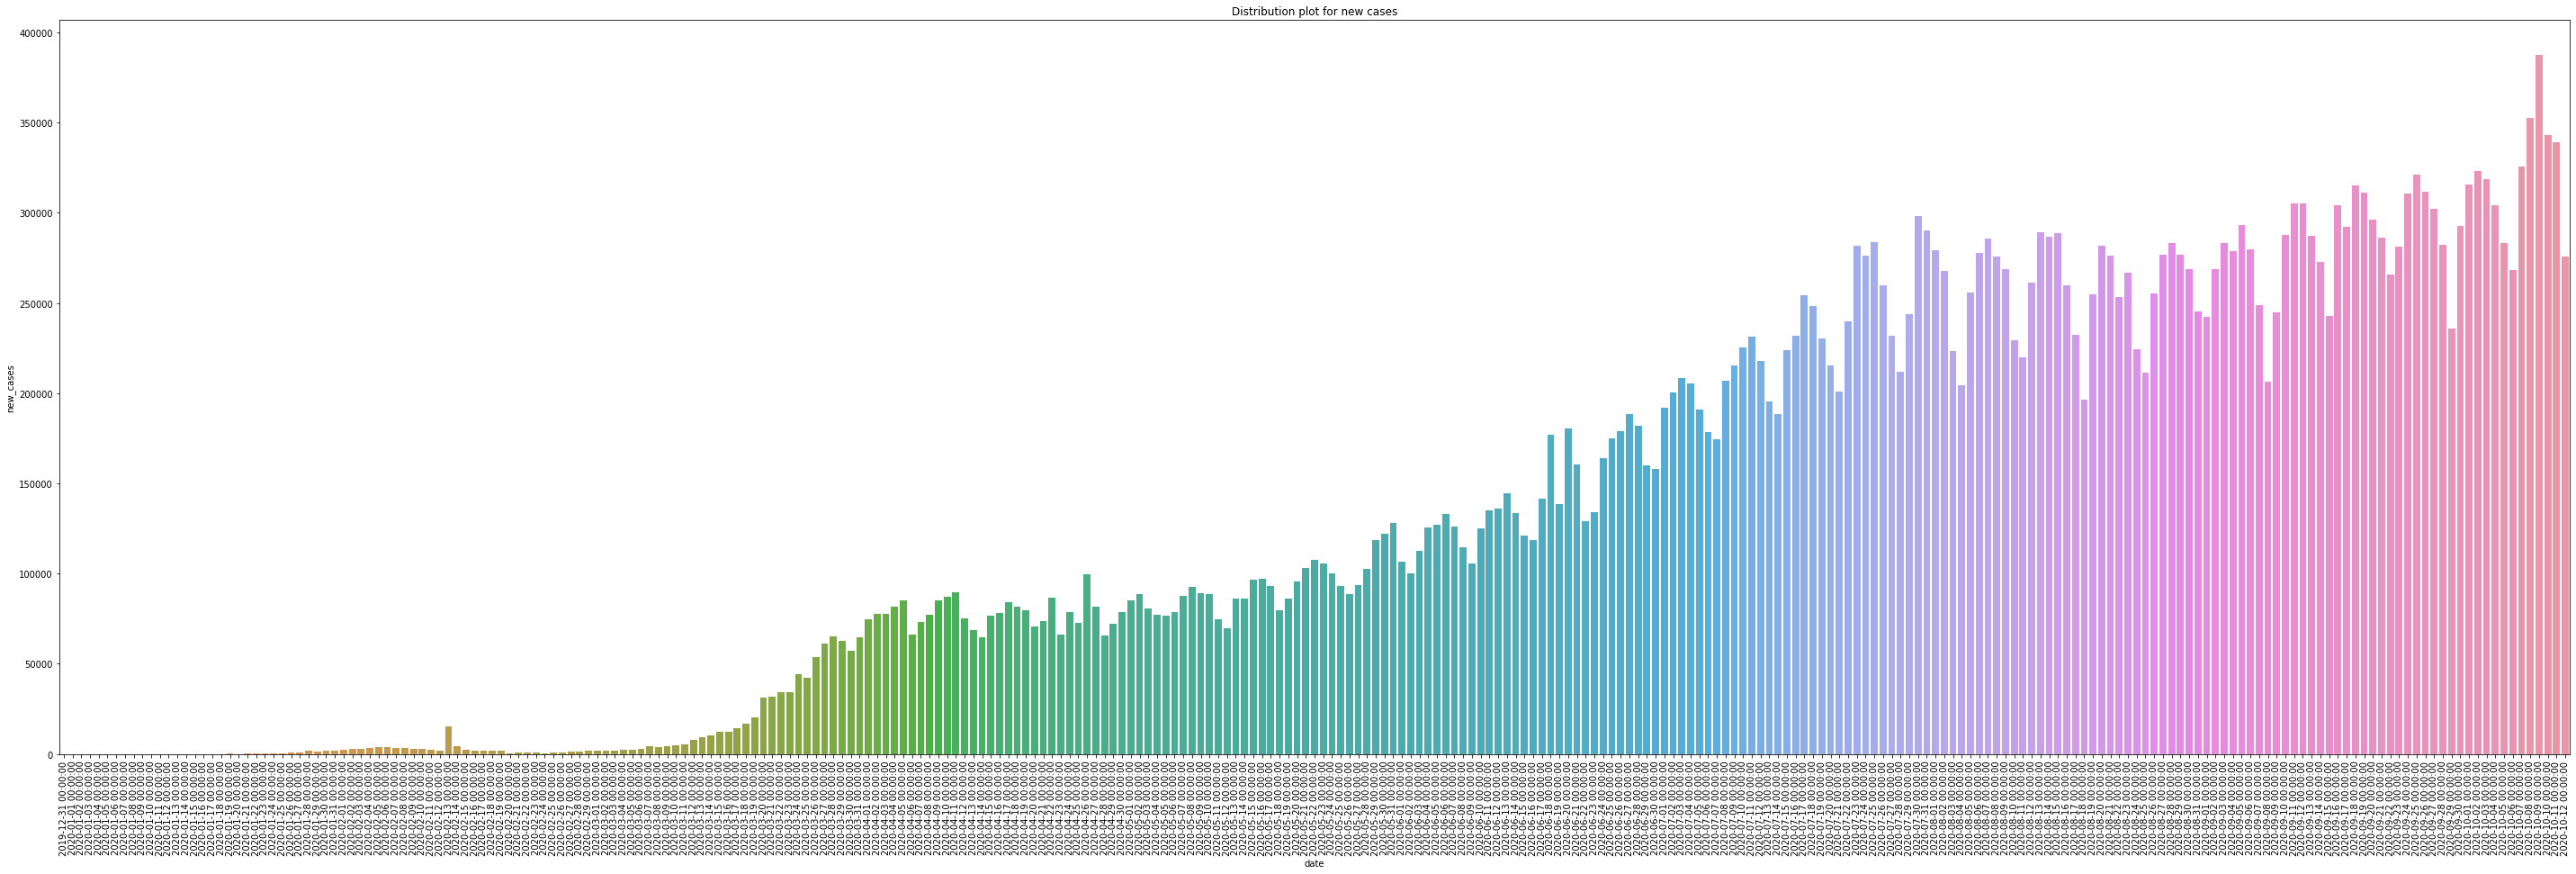

In [122]:
plt.figure(figsize=(50,15))
sns.barplot(x=datewise.index,y = datewise['new_cases'])
plt.title("Distribution plot for new cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

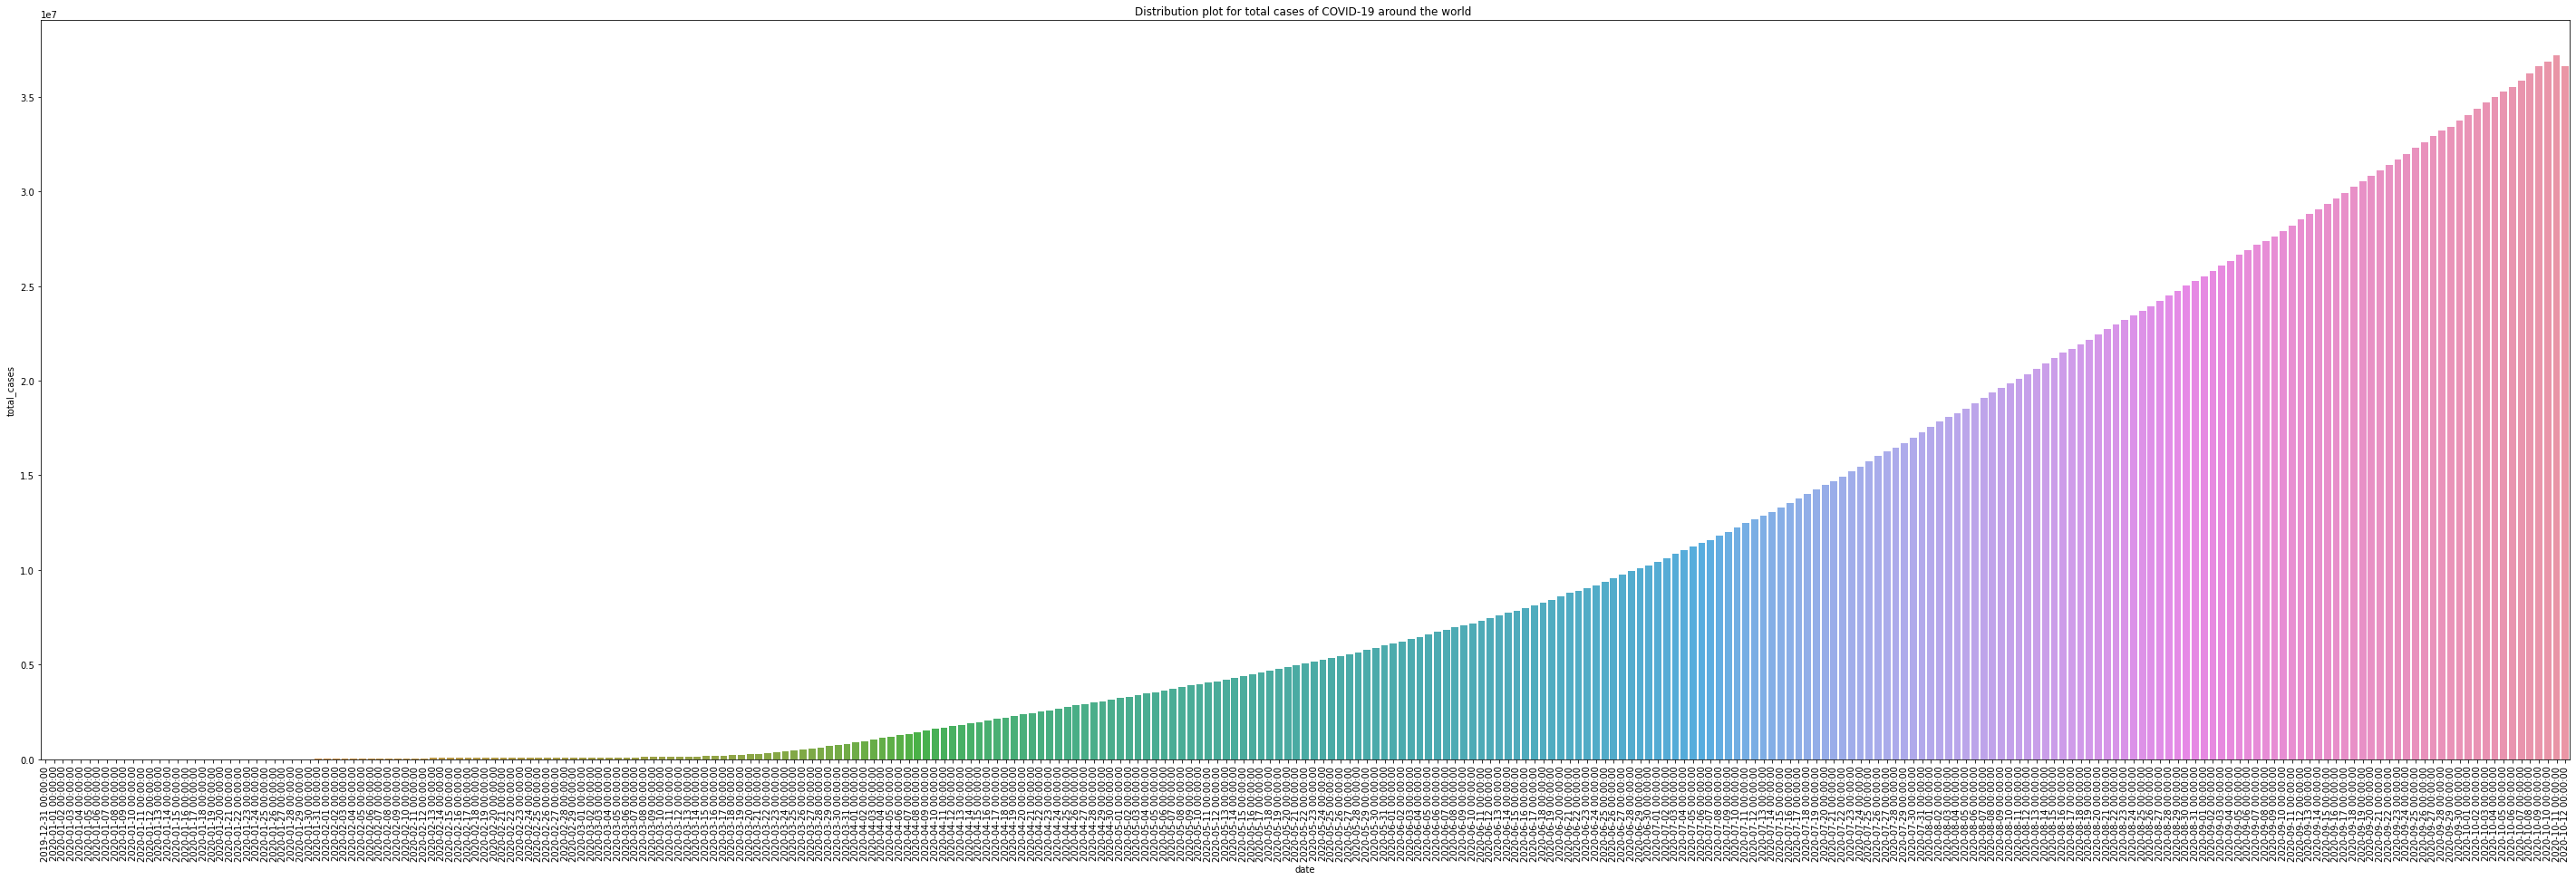

In [123]:
plt.figure(figsize=(50,15))
sns.barplot(x=datewise.index,y = datewise['total_cases'])
plt.title("Distribution plot for total cases of COVID-19 around the world ")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

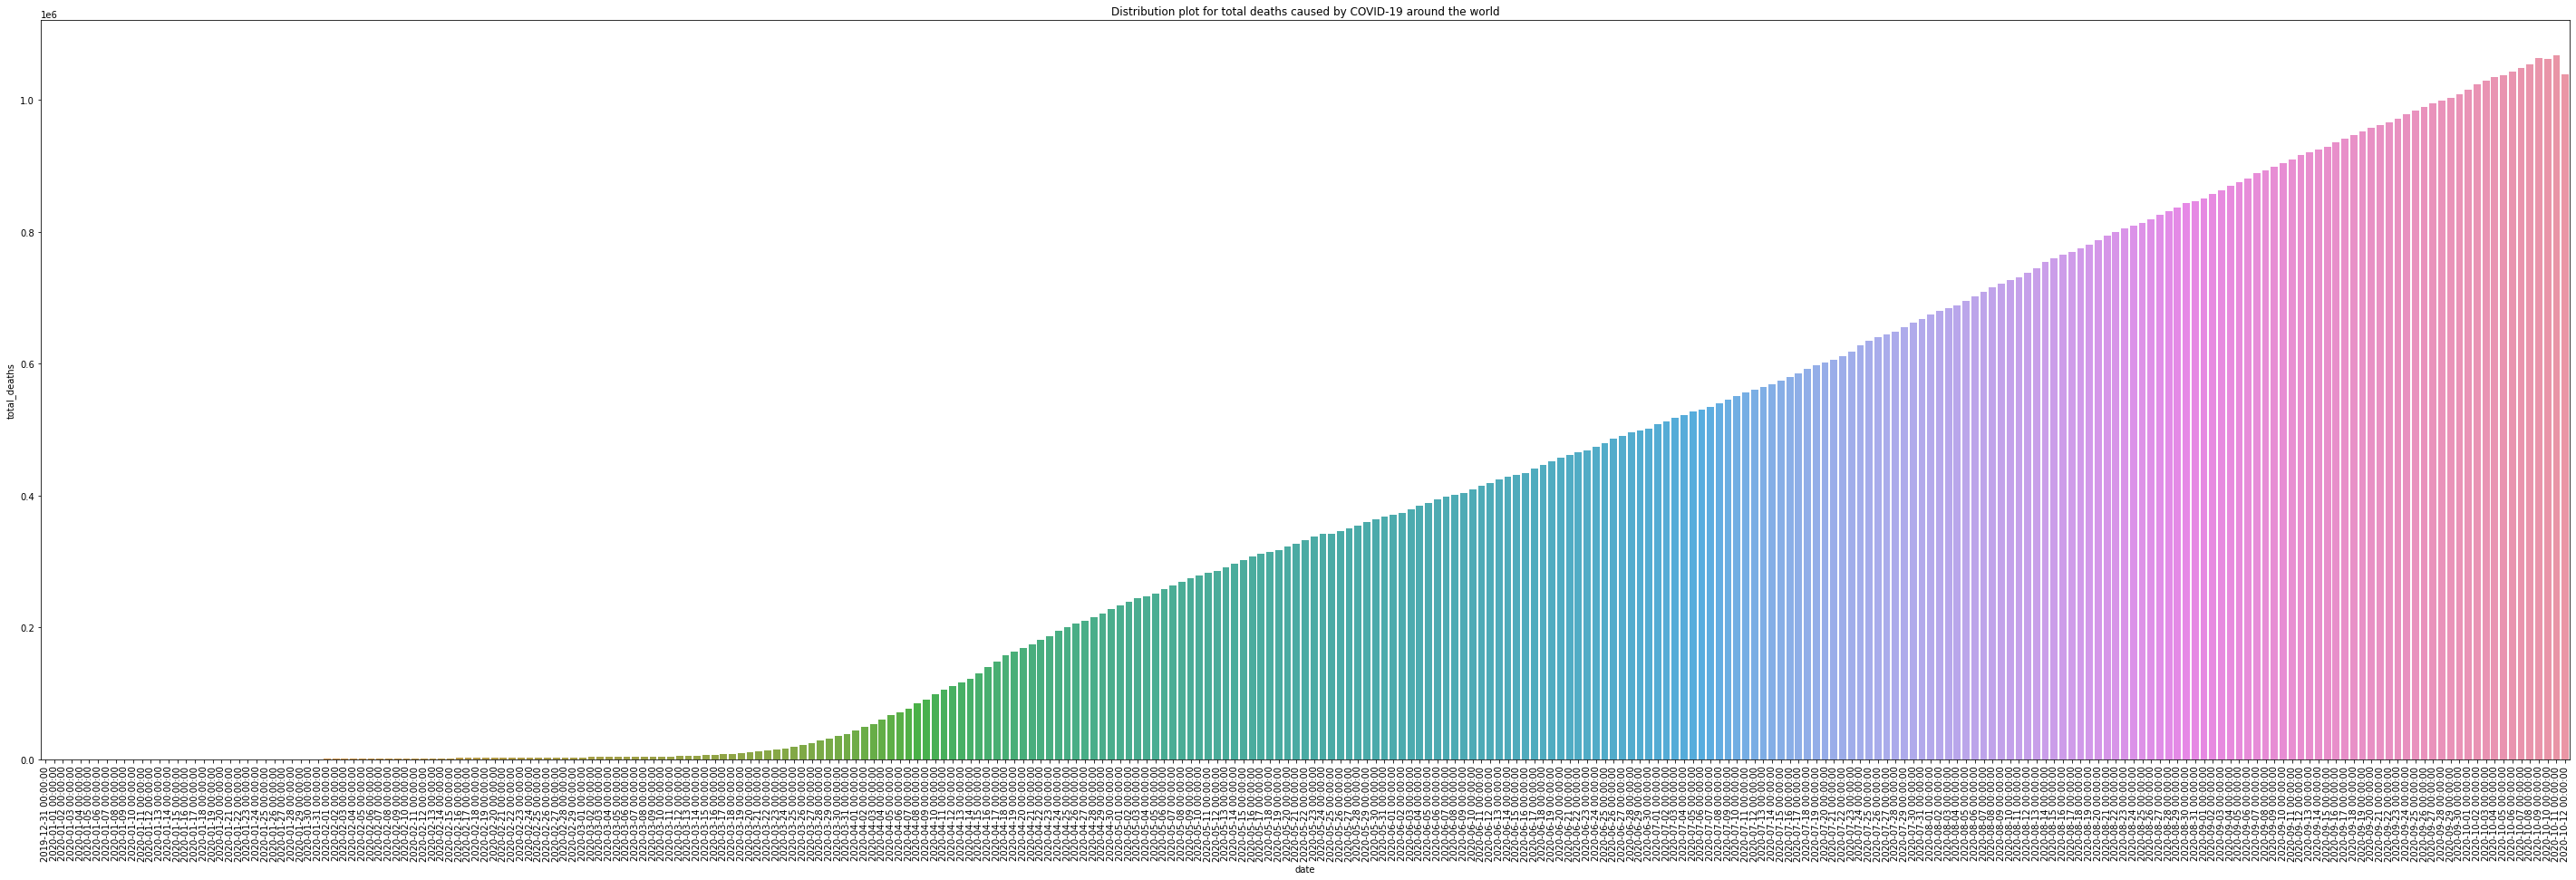

In [124]:
plt.figure(figsize=(50,15))
sns.barplot(x=datewise.index,y = datewise['total_deaths'])
plt.title("Distribution plot for total deaths caused by COVID-19 around the world")
plt.xticks(rotation=90)

In [125]:
datewise.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_tests,total_tests,new_tests_smoothed
date,,,,,,,,,
2019-12-31,27.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,27.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0
2020-01-02,27.0,0.0,0.0,0.0,0.0,0.0,16.0,20.0,0.0
2020-01-03,44.0,17.0,0.0,0.0,0.0,0.0,18.0,38.0,0.0
2020-01-04,44.0,0.0,0.0,0.0,0.0,0.0,6.0,44.0,0.0


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

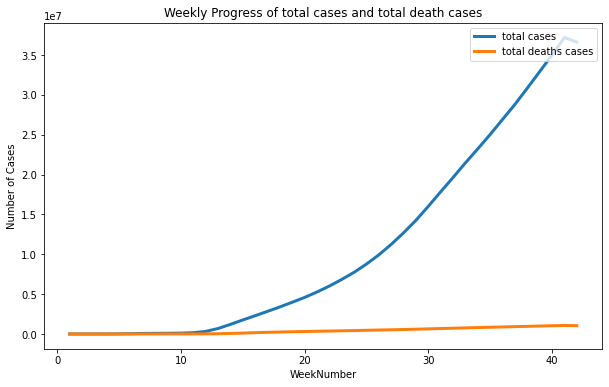

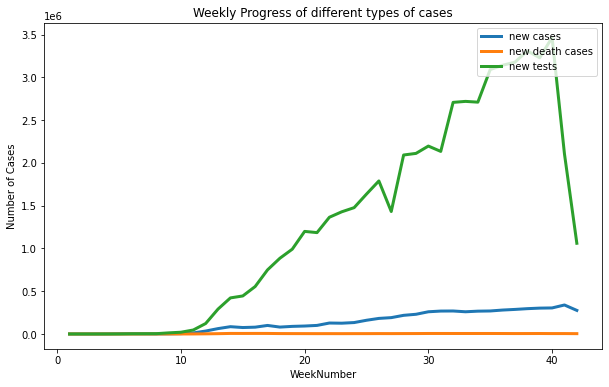

In [126]:

datewise["WeekofYear"] = pd.Int64Index(datewise.index.isocalendar().week)

week_num = []
weekwise_total_cases = []
weekwise_new_cases = []
weekwise_total_deaths = []
weekwise_new_deaths = []
weekwise_new_tests = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_total_cases.append(datewise[datewise["WeekofYear"] == i]["total_cases"].iloc[-1])
    weekwise_new_cases.append(datewise[datewise["WeekofYear"] == i]["new_cases"].iloc[-1])
    weekwise_total_deaths.append(datewise[datewise["WeekofYear"] == i]["total_deaths"].iloc[-1])
    weekwise_new_deaths.append(datewise[datewise["WeekofYear"] == i]["new_deaths"].iloc[-1])
    weekwise_new_tests.append(datewise[datewise["WeekofYear"] == i]["new_tests"].iloc[-1])
    week_num.append(w)
    w += 1

plt.figure(figsize = (10,6))
plt.plot(week_num, weekwise_total_cases, linewidth = 3)
plt.plot(week_num, weekwise_total_deaths, linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of Cases")
plt.legend(('total cases','total deaths cases'),loc = 'upper right')
plt.title("Weekly Progress of total cases and total death cases")
    
plt.figure(figsize = (10,6))
plt.plot(week_num, weekwise_new_cases, linewidth = 3)
plt.plot(week_num, weekwise_new_deaths, linewidth =3)
plt.plot(week_num, weekwise_new_tests, linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of Cases")
plt.legend(('new cases', 'new death cases', 'new tests'),loc = 'upper right')
plt.title("Weekly Progress of different types of cases")


In [127]:
#Countrywise analysis
#Countywise mortality rate
countrywise = df[df['date'] == df['date'].max()].groupby(["location"]).agg({'total_cases': "sum", "new_cases": "sum", "new_cases_smoothed": "sum", "total_deaths": "sum",
                                    'new_deaths': 'sum', 'new_deaths_smoothed': 'sum', 'new_tests': 'sum', 'total_tests': 'sum','new_tests_smoothed': 'sum',}).sort_values(['total_cases'],ascending = False)
countrywise["mortality_rate"] = (countrywise["total_deaths"]/countrywise["total_cases"])*100



Text(0.5, 1.0, 'Top 15 countries as per total no of death cases')

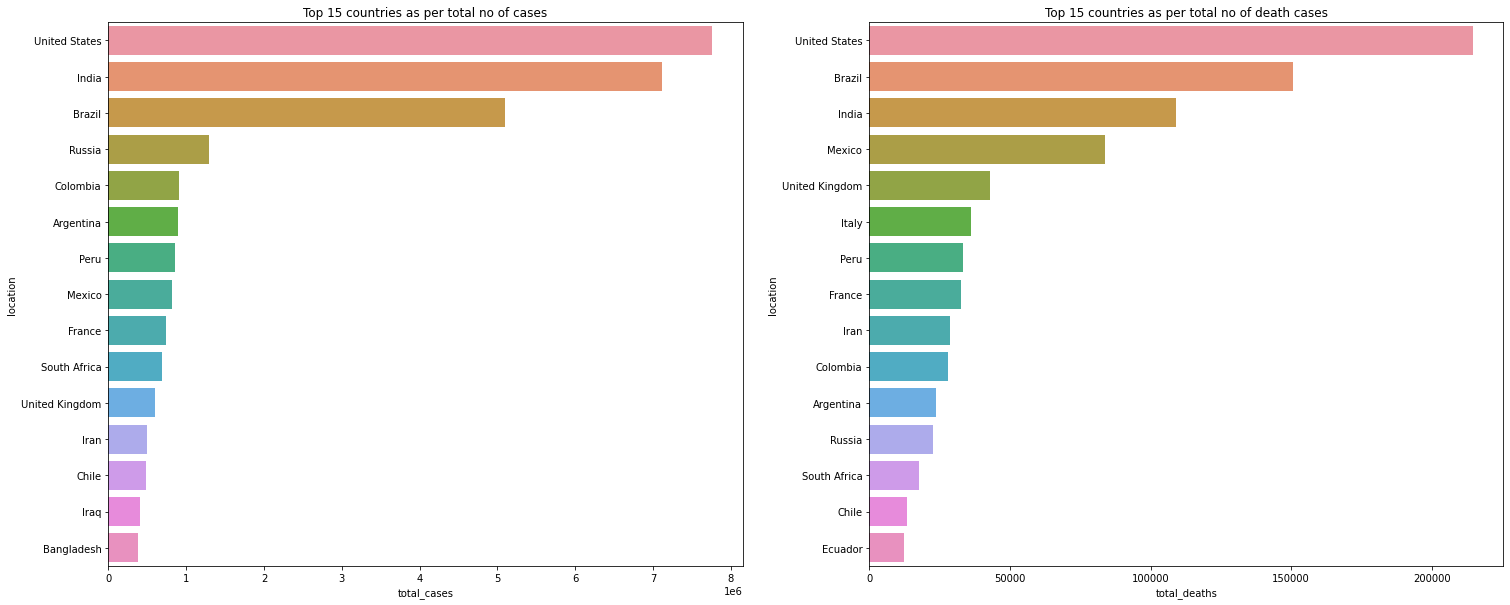

In [128]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (25,10))
top_15total_cases = countrywise.sort_values(["total_cases"],ascending = False).head(15)
top_15total_deaths = countrywise.sort_values(["total_deaths"],ascending = False).head(15)
sns.barplot(x= top_15total_cases["total_cases"], y = top_15total_cases.index, ax =ax1)
ax1.set_title("Top 15 countries as per total no of cases")
sns.barplot(x= top_15total_deaths["total_deaths"], y = top_15total_deaths.index, ax =ax2)
ax2.set_title("Top 15 countries as per total no of death cases")


Text(0.5, 1.0, 'Top 15 countries as per total no of new death cases')

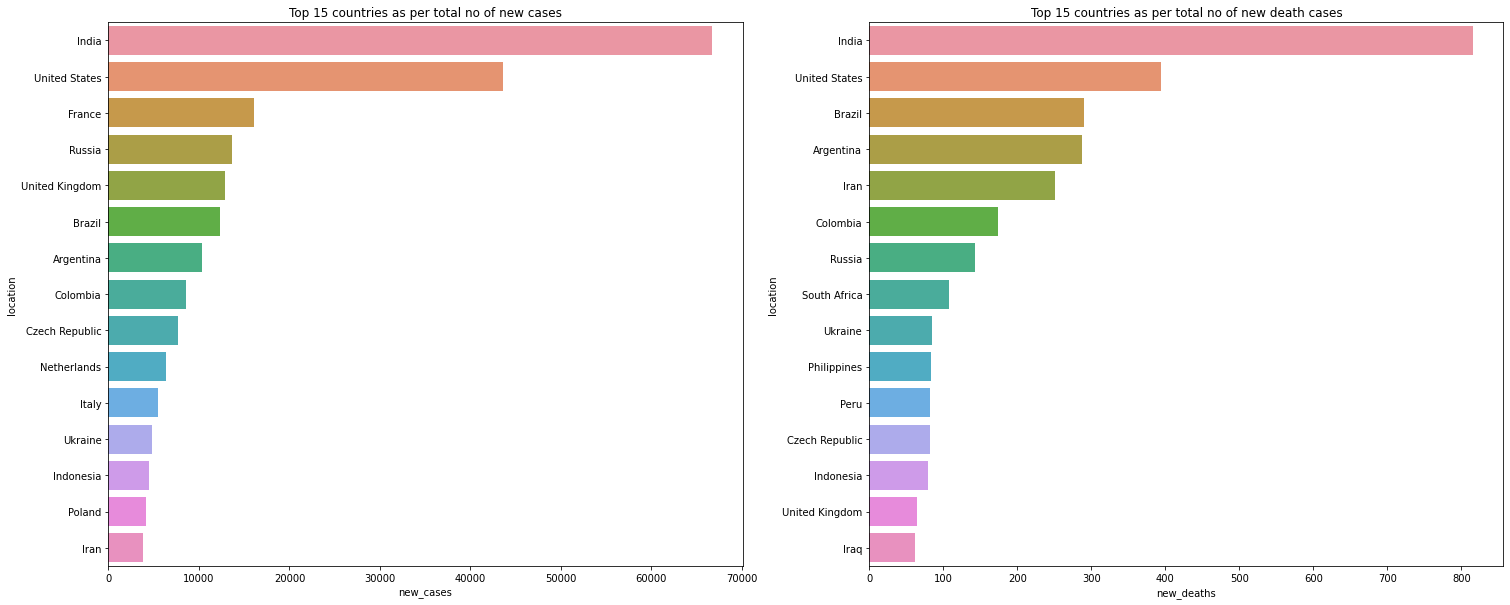

In [129]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (25,10))
top_15new_cases = countrywise.sort_values(["new_cases"],ascending = False).head(15)
top_15new_deaths = countrywise.sort_values(["new_deaths"],ascending = False).head(15)
sns.barplot(x= top_15new_cases["new_cases"], y = top_15new_cases.index, ax =ax1)
ax1.set_title("Top 15 countries as per total no of new cases")
sns.barplot(x= top_15new_deaths["new_deaths"], y = top_15new_deaths.index, ax =ax2)
ax2.set_title("Top 15 countries as per total no of new death cases")


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

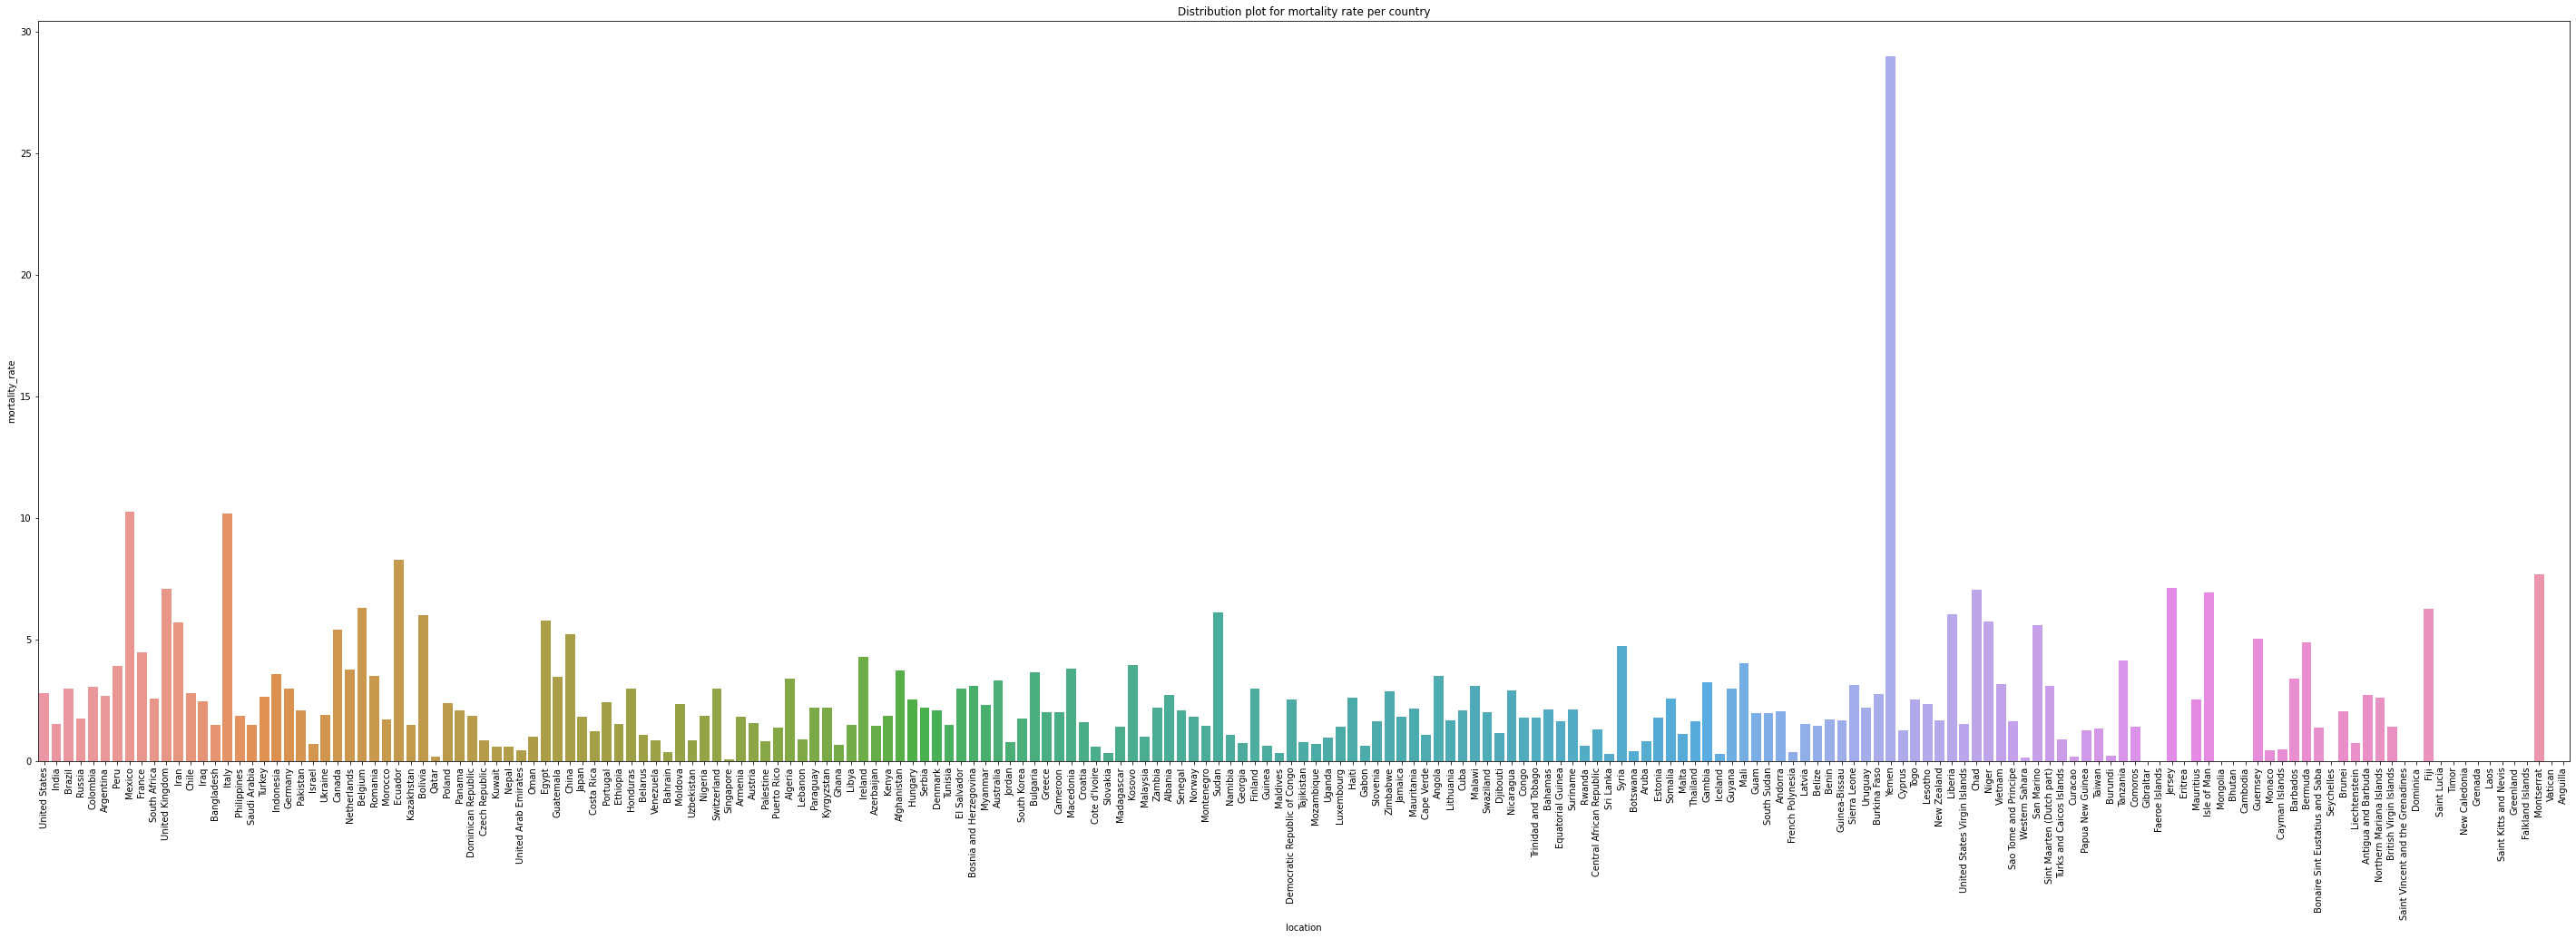

In [130]:
plt.figure(figsize=(50,15))
sns.barplot(x=countrywise.index,y = countrywise['mortality_rate'])
plt.title("Distribution plot for mortality rate per country")
plt.xticks(rotation=90)

In [131]:
'Nepal' in df['location'].unique()

True

In [132]:
#Data Analysis for Nepal
Nepal_data = df[df['location'] == 'Nepal']
Nepal_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34449,NPL,Asia,Nepal,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34450,NPL,Asia,Nepal,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34451,NPL,Asia,Nepal,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34452,NPL,Asia,Nepal,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34453,NPL,Asia,Nepal,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


In [133]:
Nepal_data.shape
Nepal_data.describe()
Nepal_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [134]:
datewise_nepal = Nepal_data.groupby(['date']).agg({"total_cases": "sum","new_cases": "sum", "total_deaths": "sum", "new_deaths":"sum",
                                                  "total_tests": "sum", "new_tests": "sum"})
print(datewise_nepal.iloc[-1])
print("Total confirmed cases", datewise_nepal['total_cases'].iloc[-1])
print("New cases",datewise_nepal["new_cases"].iloc[-1])
print("Total death cases",datewise_nepal['total_deaths'].iloc[-1])


total_cases     107755.0
new_cases         2071.0
total_deaths       636.0
new_deaths          22.0
total_tests          0.0
new_tests            0.0
Name: 2020-10-12 00:00:00, dtype: float64
Total confirmed cases 107755.0
New cases 2071.0
Total death cases 636.0


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

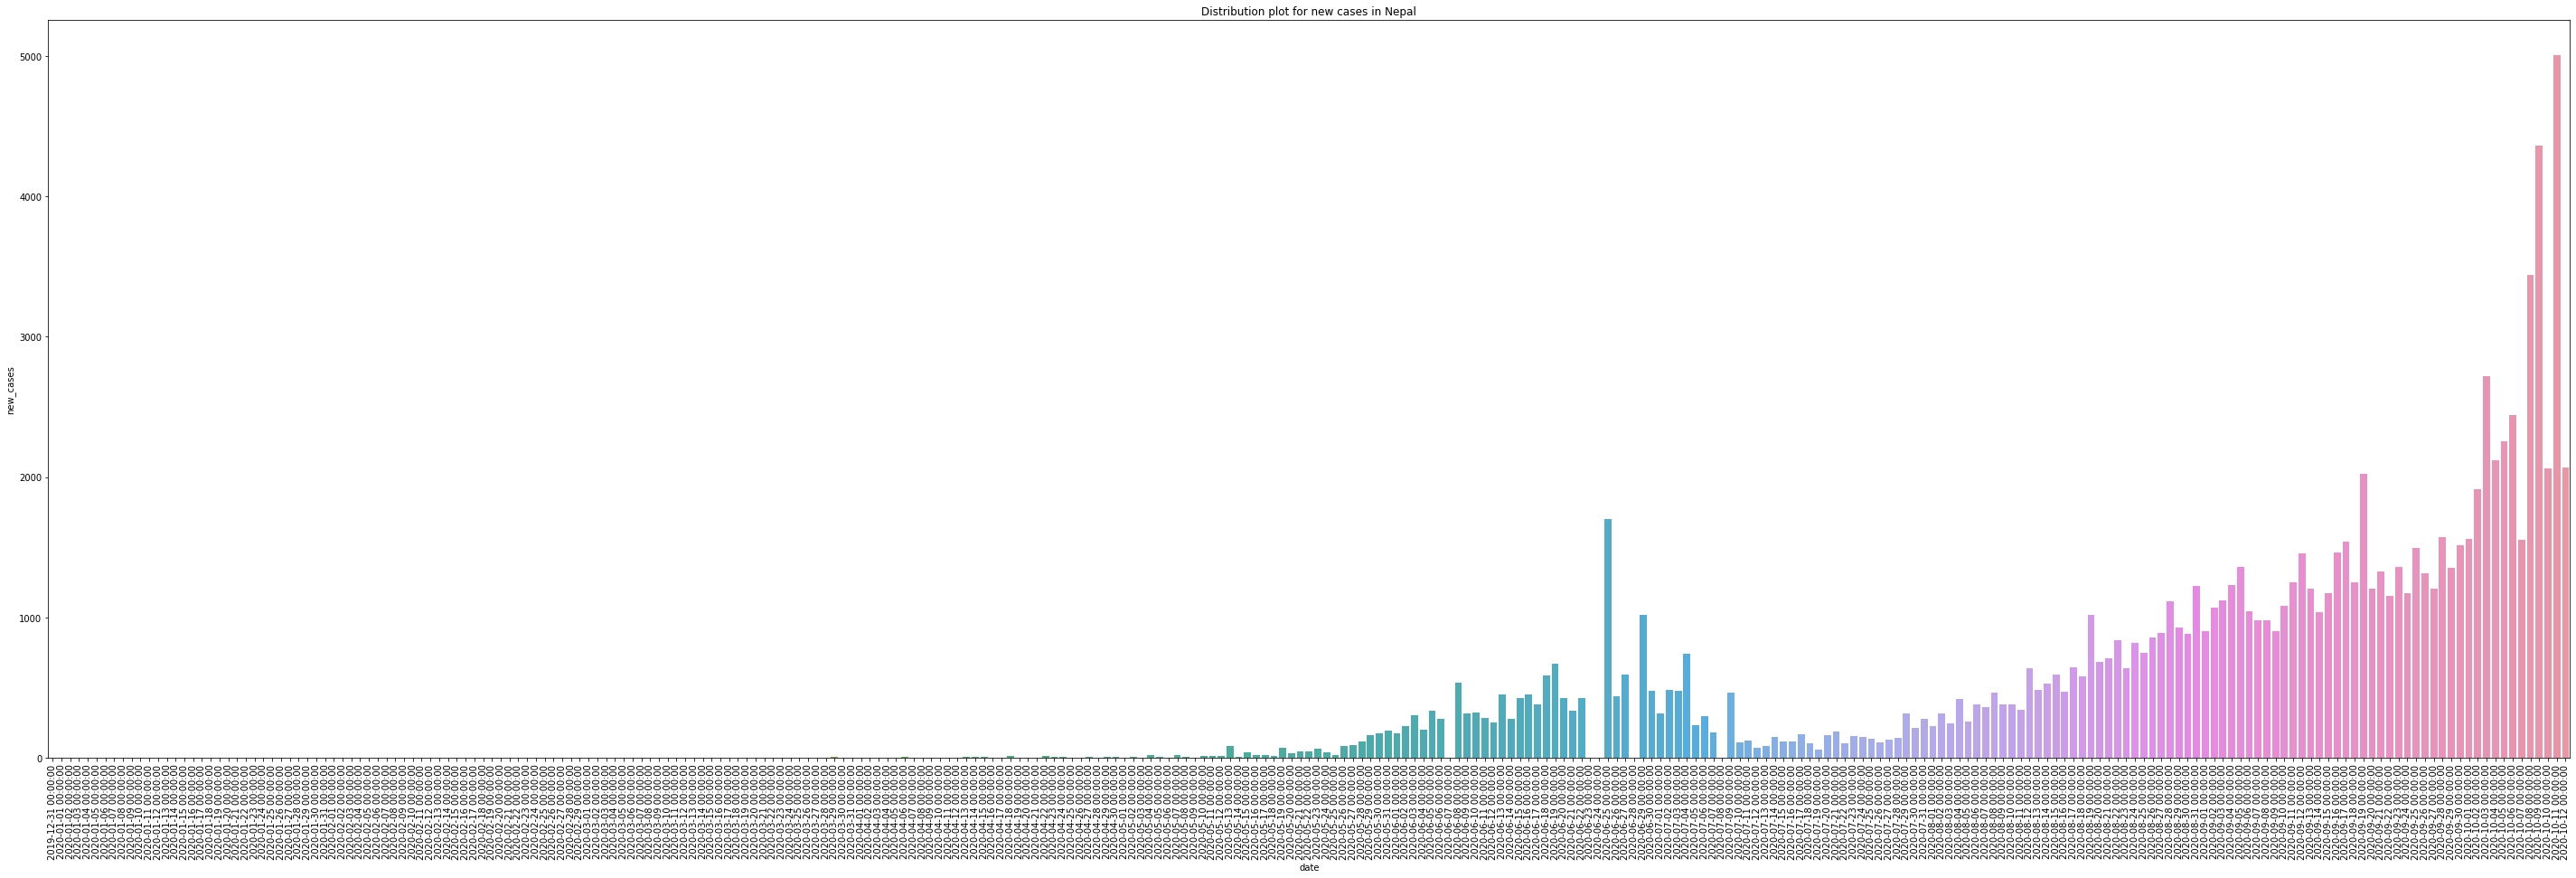

In [135]:
plt.figure(figsize=(50,15))
sns.barplot(x=datewise_nepal.index,y = datewise_nepal['new_cases'])
plt.title("Distribution plot for new cases in Nepal")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

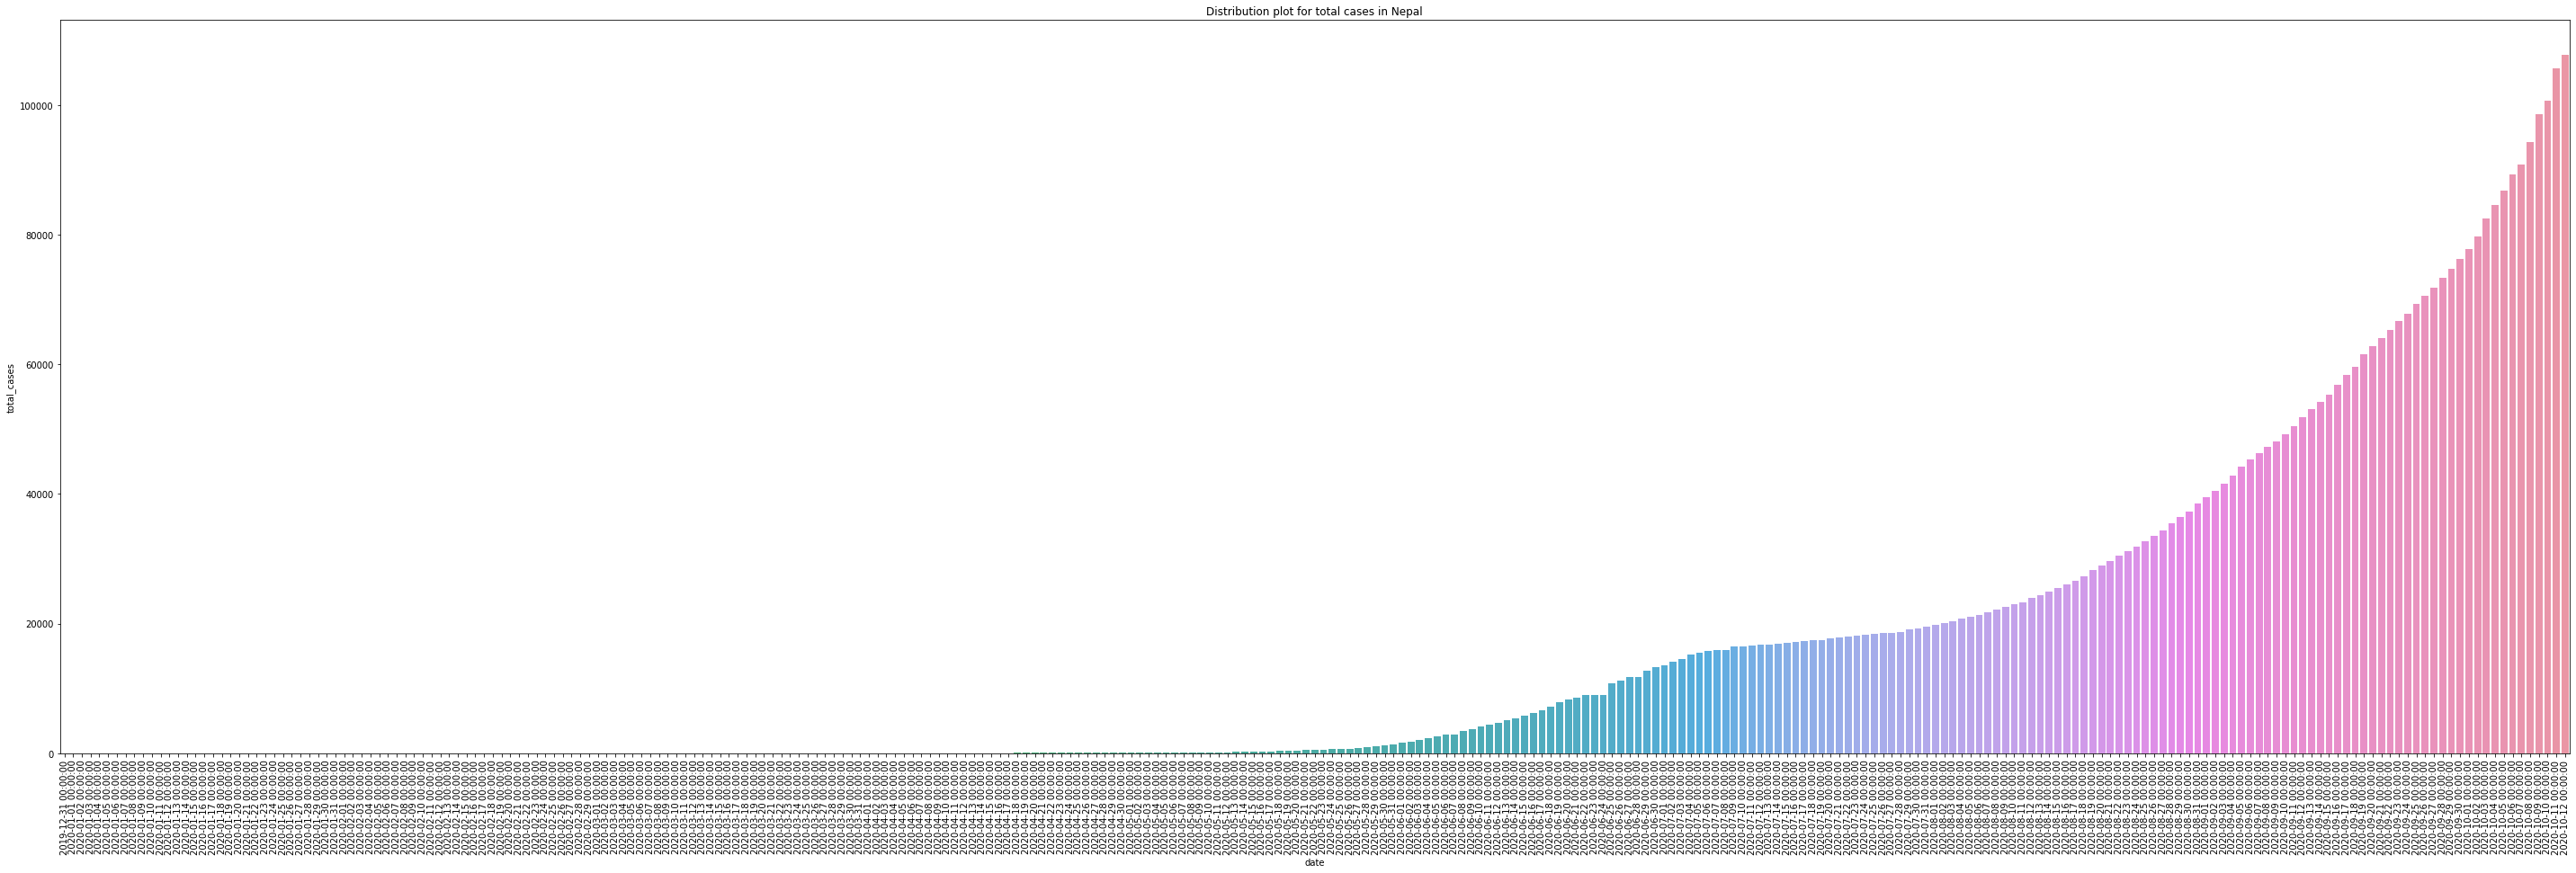

In [136]:
plt.figure(figsize=(50,15))
sns.barplot(x=datewise_nepal.index,y = datewise_nepal['total_cases'])
plt.title("Distribution plot for total cases in Nepal")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

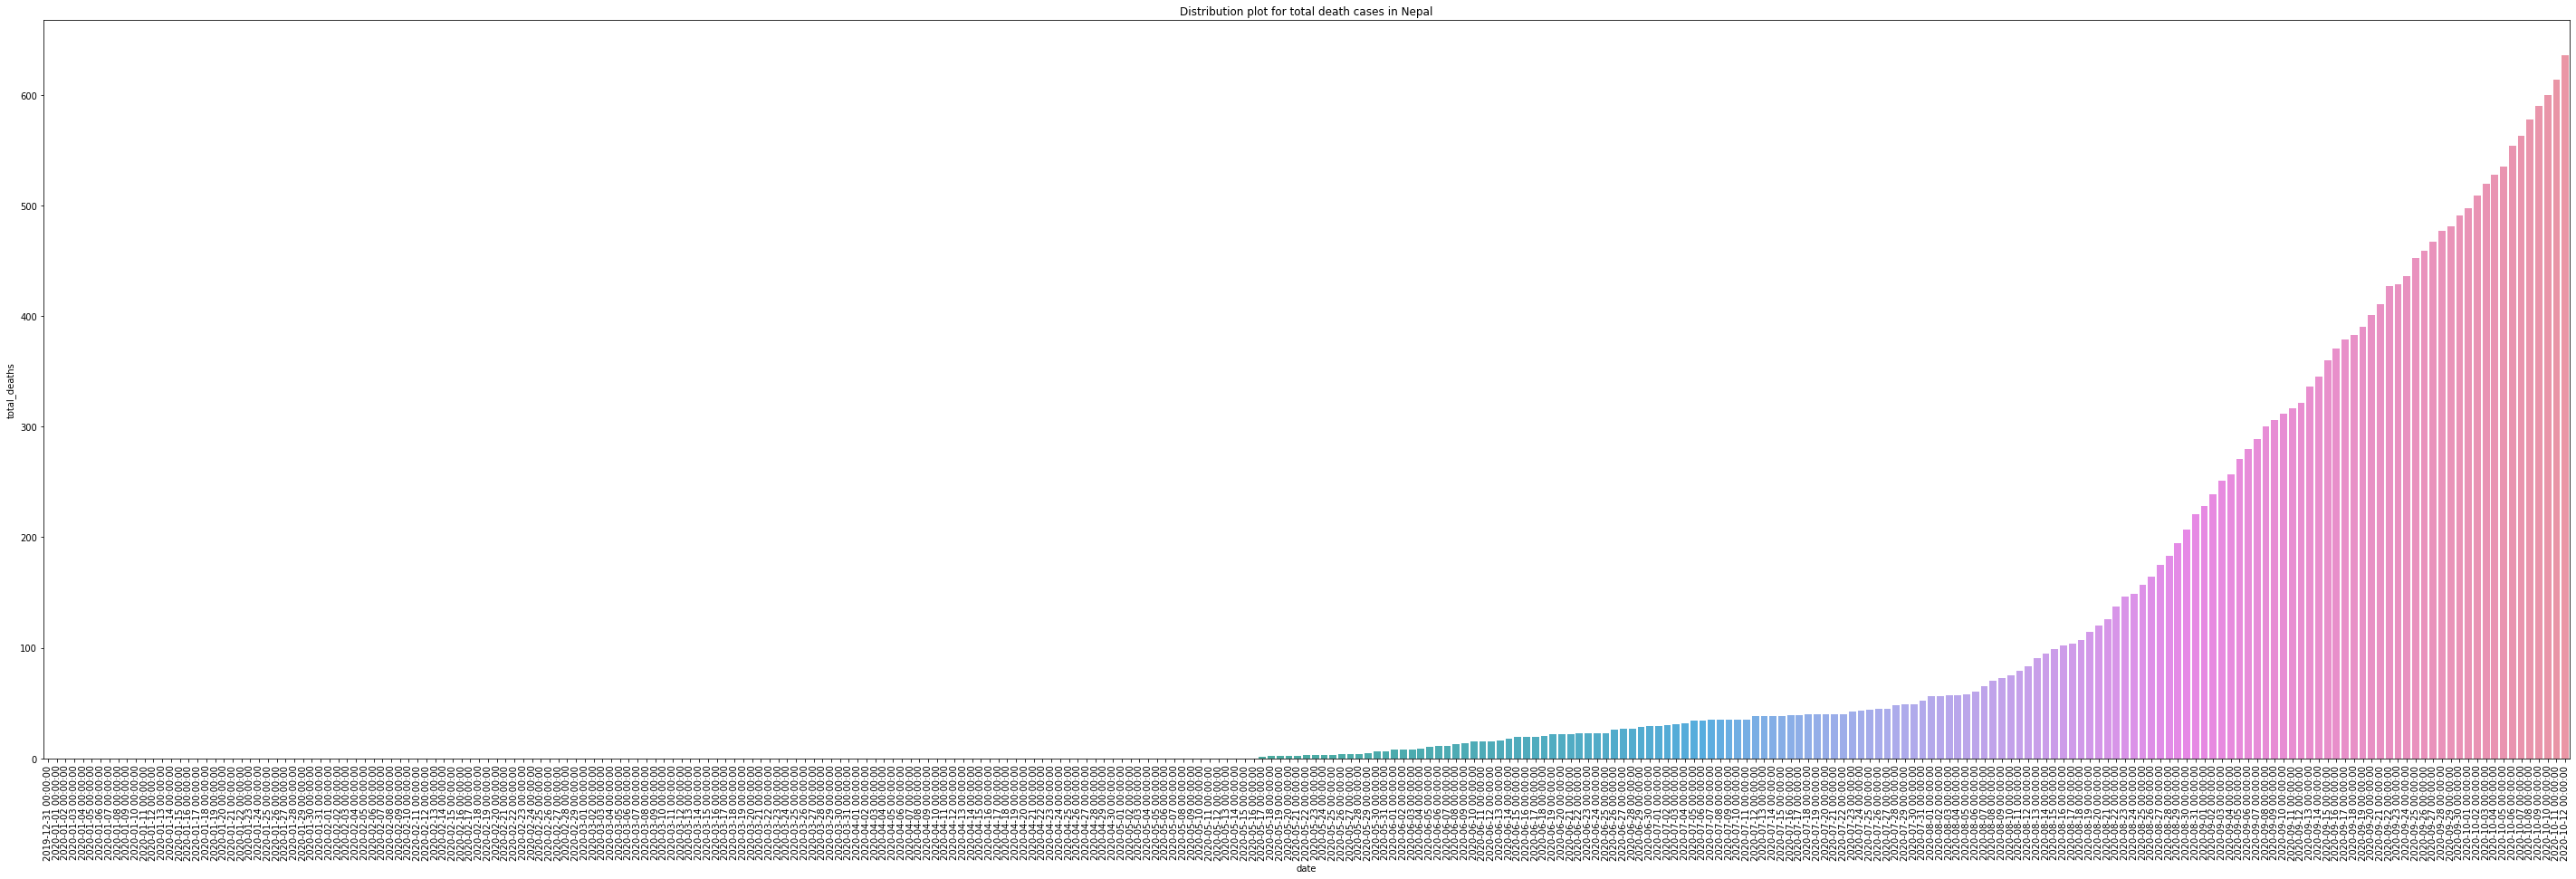

In [137]:
plt.figure(figsize=(50,15))
sns.barplot(x=datewise_nepal.index,y = datewise_nepal['total_deaths'])
plt.title("Distribution plot for total death cases in Nepal")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

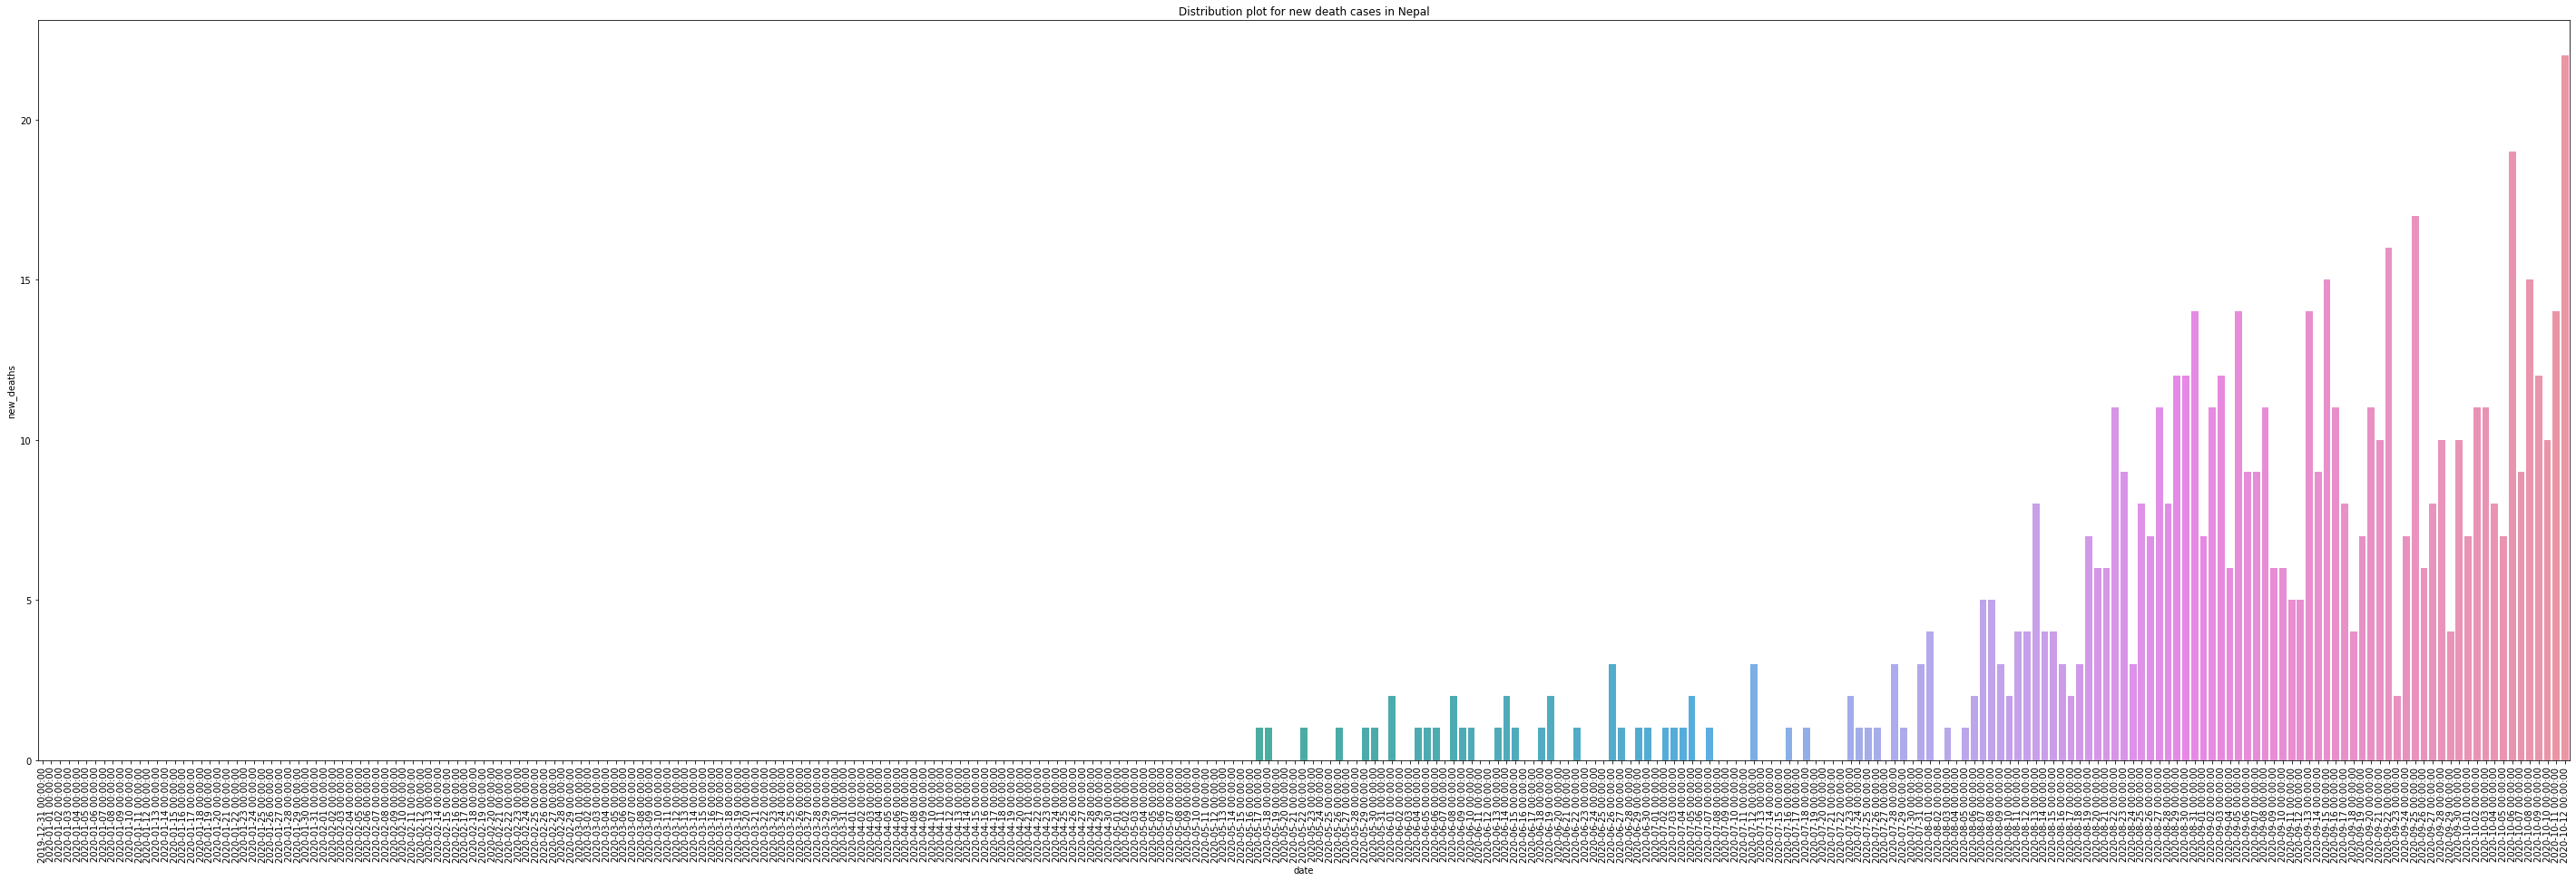

In [138]:
plt.figure(figsize=(50,15))
sns.barplot(x=datewise_nepal.index,y = datewise_nepal['new_deaths'])
plt.title("Distribution plot for new death cases in Nepal")
plt.xticks(rotation=90)

In [139]:
max_nep = datewise_nepal["total_cases"].max()
china_data = df[df['location'] == 'China']
us_data = df[df['location'] == 'United States']
india_data = df[df['location'] == 'India']
brazil_data = df[df['location'] == 'Brazil']
russia_data = df[df['location'] == 'Russia']
datewise_china = china_data.groupby(['date']).agg({"total_cases": "sum","new_cases": "sum", "total_deaths": "sum", "new_deaths":"sum",
                                                  "total_tests": "sum", "new_tests": "sum"})
datewise_brazil = brazil_data.groupby(['date']).agg({"total_cases": "sum","new_cases": "sum", "total_deaths": "sum", "new_deaths":"sum",
                                                  "total_tests": "sum", "new_tests": "sum"})
datewise_us = us_data.groupby(['date']).agg({"total_cases": "sum","new_cases": "sum", "total_deaths": "sum", "new_deaths":"sum",
                                                  "total_tests": "sum", "new_tests": "sum"})
datewise_india = india_data.groupby(['date']).agg({"total_cases": "sum","new_cases": "sum", "total_deaths": "sum", "new_deaths":"sum",
                                                  "total_tests": "sum", "new_tests": "sum"})
datewise_russia = russia_data.groupby(['date']).agg({"total_cases": "sum","new_cases": "sum", "total_deaths": "sum", "new_deaths":"sum",
                                                  "total_tests": "sum", "new_tests": "sum"})
print("It took ",datewise_nepal[datewise_nepal['total_cases']>0].shape[0], " days in Nepal to reach ", max_nep ," total cases.")
print("It took ",datewise_china[datewise_china['total_cases']>0 & (datewise_china['total_cases'] <= max_nep)].shape[0], " days in China to reach ", max_nep ," total cases.")
print("It took ",datewise_brazil[datewise_brazil['total_cases']>0 & (datewise_brazil['total_cases'] <= max_nep)].shape[0], " days in Brazil to reach ", max_nep ," total cases.")
print("It took ",datewise_us[datewise_us['total_cases']>0 & (datewise_us['total_cases'] <= max_nep)].shape[0], " days in US to reach ", max_nep ," total cases.")
print("It took ",datewise_india[datewise_india['total_cases']>0 & (datewise_india['total_cases'] <= max_nep)].shape[0], " days in India to reach ", max_nep ," total cases.")
print("It took ",datewise_russia[datewise_russia['total_cases']>0 & (datewise_russia['total_cases'] <= max_nep)].shape[0], " days in Russia to reach ", max_nep ," total cases.")



It took  249  days in Nepal to reach  107755.0  total cases.
It took  287  days in China to reach  107755.0  total cases.
It took  230  days in Brazil to reach  107755.0  total cases.
It took  266  days in US to reach  107755.0  total cases.
It took  256  days in India to reach  107755.0  total cases.
It took  255  days in Russia to reach  107755.0  total cases.


In [140]:
datewise['Days Since'] = datewise.index - datewise.index[0]
datewise['Days Since'] = datewise['Days Since'].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0] *0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0] *0.95):]
x_train = train_ml['Days Since'].to_numpy()
y_train = np.array(train_ml['total_cases'])
x_test = valid_ml['Days Since'].to_numpy()
y_test = np.array(valid_ml['total_cases'])
print(x_train)
print(y_train)
model_scores = []

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [143]:
lin_reg = LinearRegression(normalize = True)
svm = SVR(C=1,degree = 5, kernel = 'poly', epsilon = 0.001)
lin_reg.fit(x_train.reshape(-1,1), y_train)
svm.fit(x_train.reshape(-1,1), y_train)

SVR(C=1, degree=5, epsilon=0.001, kernel='poly')

In [144]:
prediction_valid_lin_reg = lin_reg.predict(x_test.reshape(-1,1))
prediction_valid_svm = svm.predict(x_test.reshape(-1,1))

In [145]:
new_date = []
new_prediction_lr = []
new_prediction_svm = []
for i in range(1,18):
    new_date.append(datewise.index[-1] + timedelta(days=i))
    new_prediction_lr.append(int(lin_reg.predict(np.array(datewise['Days Since'].max()+i).reshape(-1,1))))
    new_prediction_svm.append(int(svm.predict(np.array(datewise['Days Since'].max()+i).reshape(-1,1))))

model_predictions = pd.DataFrame(zip(new_date, new_prediction_lr,new_prediction_svm),columns = ['Dates', 'LR', 'SVR'])
model_predictions.head(10)

    

,Dates,LR,SVR
0,2020-10-13,25970103,18156971
1,2020-10-14,26085091,18405054
2,2020-10-15,26200079,18656607
3,2020-10-16,26315068,18911666
4,2020-10-17,26430056,19170267
5,2020-10-18,26545044,19432447
6,2020-10-19,26660032,19698244
7,2020-10-20,26775021,19967694
8,2020-10-21,26890009,20240835
9,2020-10-22,27004997,20517705


In [146]:
model_train = datewise.iloc[:int(datewise.shape[0]*0.85)]
valid = datewise.iloc[:int(datewise.shape[0]*0.85):]

In [147]:
holt = Holt(np.asarray(model_train['total_cases'])).fit(smoothing_level = 1.4, smoothing_slope = 0.2)
y_pred = valid.copy()
y_pred['Holt'] = holt.forecast(len(valid))


In [148]:
holt_new_date = []
holt_new_prediction = []
holt_prediction = []
#length = len(valid)
#pred = holt.forecast(length+2)
#print(pred)
#print(pred[-1])
for i in range(1,18):
     holt_new_date.append(datewise.index[-1] + timedelta(days = i))
     pred = holt.forecast(len(valid)+i)
     holt_new_prediction.append(int(pred[-1]))
#print(holt_new_prediction)      
model_predictions["Holts linear model predictions"] = holt_new_prediction
model_predictions.head()

,Dates,LR,SVR,Holts linear model predictions
0,2020-10-13,25970103,18156971,88847671
1,2020-10-14,26085091,18405054,89110309
2,2020-10-15,26200079,18656607,89372947
3,2020-10-16,26315068,18911666,89635585
4,2020-10-17,26430056,19170267,89898223
